<a href="https://colab.research.google.com/github/khickey25/nlp_shap_notebooks/blob/master/08_28_2020_nlp_shap_sampled_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Dataset

### Modeling and Shap analysis on Fake news Dataset.

Text data has been saved as pickle file in Dr. Tao's google drive. Will load in data using direct link or save file to my personal drive and connect my drive to this notebook.



## TODO (11:05): 
1. Run main function to get shap values for specified explanations, analyze. Somehow return the index of one it got wrong to show as an example. (got index of incorrect answers.

## TODO 8/26/12:28 Maybe run tao's other notebook with removing of reuters and last sentence first to get cleaned datasets and save them as pickle files to be used in this notebook.  (Done, set up new notebook that cleans raw data file and saves it to my drive)



In [ ]:


#housekeeping steps
from google.colab import drive
drive.mount('/content/drive')

!pip install shap

import pandas as pd
%tensorflow_version 1.13.1
import tensorflow as tf
from tensorflow.keras.preprocessing import text as kpt
import keras.backend.tensorflow_backend as K
K.set_session
import matplotlib.pyplot as plt
import shap
import sklearn.metrics as skm
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import pprint


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.13.1`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
csv_file = "/content/drive/My Drive/test_data/fake_news_20200823.csv"
pickle_file = "/content/drive/My Drive/test_data/fake-news-20200826-cleaned.pickle"
full_df = pd.read_csv(csv_file).reset_index(drop=True)
DF = pd.read_csv(csv_file)
with open(pickle_file, 'rb') as pickle_file:
  text_train = pickle.load(pickle_file)
  y_train = pickle.load(pickle_file)
  text_test = pickle.load(pickle_file)
  y_test = pickle.load(pickle_file)
for df in [text_train, y_train, text_test, y_test]:
  df.reset_index(drop=True, inplace=True)

#scratch debugging info: not info here
a,b,c,d =  train_test_split(full_df.text, full_df.label, test_size=0.2, 
                                                    random_state=0)

sampled_df = pd.read_csv('/content/drive/My Drive/test_data/sampled20200827.csv', index_col=0)


# Prepare the set of instances to explain

In [ ]:

#@title
#code for TODO 8/26/12:28
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
#data = sent_df1

sampled_df = pd.read_csv('/content/drive/My Drive/test_data/sampled20200827.csv', index_col=0)


def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six',
                   'seven','eight','nine','ten','may','also','across','among','beside',
                   'however','yet','within', 'almost'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

#need to preprocess the dataframe tao gave me to make explanations on.
#have to remove the last 40 characters to remove the citations,
#have to do the data prep steps as well. 
#all ported over from data prep notebook
for i, text in enumerate(sampled_df['content']):
  if sampled_df.iloc[i]['label'] == 1:
    print(f"yes {i}")
    sampled_df.loc[i, 'text'] = text[:-40]

review_text = sampled_df.new_text.str.lower()

review_text = review_text.apply(cleanHtml)
review_text = review_text.apply(cleanPunc)
review_text = review_text.apply(keepAlpha)

review_text = review_text.apply(removeStopWords)
explanations_text = review_text.apply(stemming)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
yes 200
yes 201
yes 202
yes 203
yes 204
yes 205
yes 206
yes 207
yes 208
yes 209
yes 210
yes 211
yes 212
yes 213
yes 214
yes 215
yes 216
yes 217
yes 218
yes 219
yes 220
yes 221
yes 222
yes 223
yes 224
yes 225
yes 226
yes 227
yes 228
yes 229
yes 230
yes 231
yes 232
yes 233
yes 234
yes 235
yes 236
yes 237
yes 238
yes 239
yes 240
yes 241
yes 242
yes 243
yes 244
yes 245
yes 246
yes 247
yes 248
yes 249
yes 250
yes 251
yes 252
yes 253
yes 254
yes 255
yes 256
yes 257
yes 258
yes 259
yes 260
yes 261
yes 262
yes 263
yes 264
yes 265
yes 266
yes 267
yes 268
yes 269
yes 270
yes 271
yes 272
yes 273
yes 274
yes 275
yes 276
yes 277
yes 278
yes 279
yes 280
yes 281
yes 282
yes 283
yes 284
yes 285
yes 286
yes 287
yes 288
yes 289
yes 290
yes 291
yes 292
yes 293
yes 294
yes 295
yes 296
yes 297
yes 298
yes 299
yes 300
yes 301
yes 302
yes 303
yes 304
yes 305
yes 306
yes 307
yes 308
yes 309
yes 310
y

In [ ]:
explanations_text.iloc[-1]

'pretti clear berni respect peopl possess whole campaign built concept steal belong peopl stori realli come surpris anyon offici democrat nation committe accus presidenti campaign sen berni sander improp access confidenti voter inform gather rival campaign hillari clinton accord sever parti offici jeff weaver vermont senat campaign manag acknowledg staffer view inform blame softwar vendor hire dnc glitch allow access weaver said sander staffer fire incid discoveri spark alarm dnc prompt shut sander campaign access strateg crucial list like democrat voter dnc maintain master list rent nation state campaign add proprietari inform gather field worker volunt firewal suppos prevent campaign view data gather rival ngp van vendor handl master file said incid occur wednesday patch appli softwar process briefli open window proprietari inform campaign said compani chief stu trevelyan said full audit conduct dnc told sander campaign allow access data provid explan well assur clinton data destroy 

# Main

In [ ]:
#define set of helper functions

class TextPreprocessor(object):
    def __init__(self, vocab_size):
        self._vocab_size = vocab_size
        self._tokenizer = None
    def create_tokenizer(self, text_list):
        tokenizer = kpt.Tokenizer(num_words = self._vocab_size)
        tokenizer.fit_on_texts(text_list)
        self._tokenizer = tokenizer
    def transform_text(self, text_list):
        text_matrix = self._tokenizer.texts_to_matrix(text_list)
        return text_matrix

def read_data():
  file = "/content/drive/My Drive/test_data/fake-news-20200826-cleaned.pickle"
  with open(file, 'rb') as pickle_file:
    text_train = pickle.load(pickle_file)
    y_train = pickle.load(pickle_file)
    text_test = pickle.load(pickle_file)
    y_test = pickle.load(pickle_file)
  for df in [text_train, y_train, text_test, y_test]:
    df.reset_index(drop=True, inplace=True)

  return text_train, y_train, text_test, y_test

def preprocess_text(vocab_size, x_train_text, x_test_text, explanations_set, text_processor):
  """Instatiates an instance of TextPreProcessor class and transforms training 
  and testing text splits.
  Arguments:
    vocab_size {int}: Size of resulting tokenized train and test splits.
    x_train_text {pandas.Series}: Training set of text to tokenize.
    x_test_text {pandas.series}: Testing set of text to tokenize.
    explanations_set{pandas.Series}: Set of instances to create explanations in tokenized form.
    text_processor {class '__main__.TextPreprocessor'}: Tokenizer to tokenize train/test text splits.
  Returns:
    X_train {numpy.ndarray}: Tokenized/OHE text training split.
    X_test {numpy.ndarray}: Tokenized/OHE text test split.
    """
  
  text_processor.create_tokenizer(x_train_text.iloc[:])
  X_train_tokenized = text_processor.transform_text(x_train_text) 
  X_test_tokenized = text_processor.transform_text(x_test_text)

  #make tokenized explanations set
  tokenized_explanations_set = text_processor.transform_text(explanations_set)
  return X_train_tokenized, X_test_tokenized, tokenized_explanations_set

def word_lookup_creation(processor):
  """Creates a mapping between original text and resulting words in text training split.
  Returns:
    words {dict}: Dictionary where keys are particular word in vocabulary,
                  and value is the index of said word (E.g. {'person': 1, 'gpe': 2 }).
    word_lookup {list}: List of words ordered by their index position of length vocabulary size 
                        (E.g. ['person', 'gpe',...])
                        """ 
                
  words = processor._tokenizer.word_index
  word_lookup = list()
  for i in words.keys():
      word_lookup.append(i)
  word_lookup = [''] + word_lookup
  return words, word_lookup

def create_model(input_shape):
  """Instantiates a text classifier and returns it.
  Arguments:
    input_shape {int}: Size of input array, typically the vocabulary size.
    num_tags {int}: ???
  Returns:
    model {tf.keras.Sequential}: Instantiated model to be trained.  
    """
  tf.random.set_random_seed(2020)
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(50, input_shape = (input_shape,), activation='relu'))
  model.add(tf.keras.layers.Dense(25, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
  return model

def train_and_score(model, train_data_X, train_data_y, test_data_X, test_data_y, 
                  n_epochs, batch_size):
  """Train text classifier on particular set of text and print evaluation metrics.
  Arguments:
    model {tf.keras.Sequential}: Instantiated model to be trained.
    train_data_X {numpy.ndarray}: Training text data.
    train_data_y {numpy.ndarray}: Training text labels.
    test_data_X {numpy.ndarray}: Testing text data.
    test_data_y {numpy.ndarray}: Testing text labels.
    n_epochs {int}: Number of epochs to train through.
    batch_size {int}: Batch size to train on.
    """
  model.fit(train_data_X, train_data_y, epochs=n_epochs, batch_size=batch_size, 
            validation_split=0.1)
  print('Eval loss/accuracy:{}'.format(model.evaluate(test_data_X, test_data_y,
                                                      batch_size = batch_size)))
  return model

def shap_vals_calculation(
                        train_set:np.ndarray, explanation_set:np.ndarray,
                        model:tf.python.keras.engine.sequential.Sequential):
  """Calculates shap values of corresponing text classifier.
  Arguments:
    #n_examples {int}: Number of examples to integrate over.
    #n_eplanations {int}: Number of explanations to create. 
    train_set {numpy.ndarray}: Training set.
    explanation_set {numpy.ndarray}: Testing set to create shap value explantions for.
    model {tf.keras.Sequential}: Trained model to evaluate.
  Returns:
    shap_vals {tuple}: tuple of shap values of shape:
                      ((n_explantions, vocabulary size) x # of classes)
    explainer {shap.explainer.Explainer}: Explainer object???
    """
  attrib_data = train_set
  explainer = shap.DeepExplainer(model, attrib_data)
  
  #create shap values for specific combination of genres
  shap_vals = explainer.shap_values(explanation_set)
  return shap_vals, explainer

def display_shap_figures(shap_values, test_set, word_lookup_reference):
  """Displays shap global summary plot and summary plot for each individual class/genre.
  Arguments:
    shap_values {list}: List of calculated shap values.
    test_set {numpy.ndarray}: Testing examples to display explanations about.
    word_lookup_reference {list}: list of words in vocabulary ordered by index position 
                                  to display on figures.
                                  """

  shap.summary_plot(shap_values, feature_names=word_lookup_reference, 
                    class_names=y_train.columns)

  for i in range(len(shap_values)):
    print(y_test.columns[i])
    shap.summary_plot(shap_values[i], test_set[:shap_values[0].shape[0]],
                      feature_names=word_lookup_reference, 
                      class_names=y_train.columns)



In [ ]:
#main function to train model on specified datasets. 
#make list of features to remove from training sets and retrain
#model for performance comparison

def main(instances_to_explain, shap_n_examples=5000,
         vocab_size=5000):

  #read in presaved data
  text_train, y_train, text_test, y_test = read_data() 
  
  #instantiate Tokenizer and tokenize train and test splits.
  print("[INFO] Processing Text...\n")
  processor = TextPreprocessor(vocab_size=vocab_size)
  X_train, X_test, tokenized_explanation_set = preprocess_text(vocab_size=vocab_size, x_train_text=text_train,
                                    x_test_text=text_test, explanations_set=instances_to_explain,
                                    text_processor=processor)
  
  #create word_index reference for future figures. 
  word_dict, word_lookup = word_lookup_creation(processor=processor)

  
  #instantiate and train model on train split.
  print("[INFO] Creating and Training Model...\n")
  model = create_model(input_shape=vocab_size)
  
  trained_model = train_and_score(model, train_data_X=X_train, train_data_y=y_train, 
                                  test_data_X=X_test, test_data_y=y_test,
                                  n_epochs=10, batch_size=128)
  
  #make predictions for confusion matrix and classification report
  y_pred = trained_model.predict(X_test)
  
  print("[INFO] Displaying Confusion Matrix ...\n")
  cm = skm.multilabel_confusion_matrix(y_test.values, y_pred.round(0))
  print(cm, "\n")

  incorrect = y_test[y_pred.reshape(-1).round(0) != y_test.values].index

  #calculate shap values; n_examples=50000 and n_explantions=250 
  print("[INFO] Calculating Shap Values...\n")
  
  shap_vals, explainer = shap_vals_calculation(
                                      train_set=X_train[:shap_n_examples],
                                      explanation_set=tokenized_explanation_set,
                                      model=trained_model)
  print("[INFO] Finished.")
  
  #return items for figure purposes
  return shap_vals, explainer, word_lookup, \
  tokenized_explanation_set, incorrect, trained_model

In [ ]:
#test: explain some instance
sv, explainer, wl, tes, incorrect, clf = main(instances_to_explain=explanations_text,
                                             vocab_size=10000)
shap_matrix = np.stack(sv)

[INFO] Processing Text...

[INFO] Creating and Training Model...

Train on 32326 samples, validate on 3592 samples
Epoch 1/10
32326/32326 [==============================] - 4s 110us/sample - loss: 0.1040 - acc: 0.9685 - val_loss: 0.0488 - val_acc: 0.9858
Epoch 2/10
32326/32326 [==============================] - 3s 102us/sample - loss: 0.0204 - acc: 0.9949 - val_loss: 0.0499 - val_acc: 0.9844
Epoch 3/10
32326/32326 [==============================] - 3s 102us/sample - loss: 0.0079 - acc: 0.9983 - val_loss: 0.0561 - val_acc: 0.9852
Epoch 4/10
32326/32326 [==============================] - 3s 103us/sample - loss: 0.0053 - acc: 0.9992 - val_loss: 0.0549 - val_acc: 0.9872
Epoch 5/10
32326/32326 [==============================] - 3s 102us/sample - loss: 0.0044 - acc: 0.9992 - val_loss: 0.0662 - val_acc: 0.9875
Epoch 6/10
32326/32326 [==============================] - 3s 103us/sample - loss: 0.0051 - acc: 0.9989 - val_loss: 0.0799 - val_acc: 0.9858
Epoch 7/10
32326/32326 [=====================

In [ ]:
print(sv[0].shape)

(400, 10000)


('Article 0: Senior U.S. envoy tries to calm fears over State Department '
 're-designThe No. 2 U.S. diplomat on Tuesday sought to allay concerns among '
 'the State Department’s rank-and-file employees over possible layoffs and '
 'perceptions of a lack of firm direction under the administration of '
 'President Donald Trump.U.S. Secretary of State Rex Tillerson, formerly chief '
 'executive of Exxon Mobil and new to government, has initiated a '
 'top-to-bottom re-organization of the agency, saying it will improve '
 'diplomats’ experience and help the department better meet 21st-century '
 'challenges.“Re-design is not a synonym for layoffs,” Deputy Secretary of '
 'State John Sullivan was quoted as saying by two officials who listened to '
 'his remarks to around 450 employees at a town hall-style event that was '
 'closed to journalists.Diplomats have fretted over a hiring freeze that has '
 'hampered their ability to switch jobs, the slow pace of appointments to '
 'senior positi

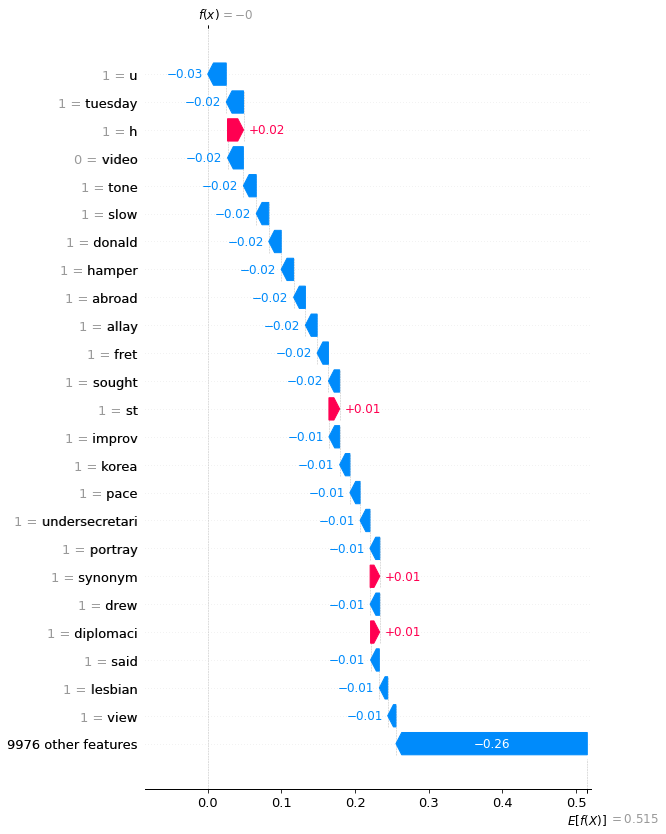

('Article 20: Democratic lawmakers question Kushner on New York property: '
 'letterA group of Democratic lawmakers on Wednesday wrote to Jared Kushner, '
 'U.S. President Donald Trump’s son-in-law and adviser, asking whether in his '
 'talks with foreign officials he had ever discussed financing for a deeply '
 'indebted Kushner Companies property in Manhattan.The property at 666 Fifth '
 'Avenue has a $1.15 billion mortgage due in less than two years, and has '
 'raised concerns among lawmakers that it could pose a conflict of interest '
 'for Kushner.  Kushner headed Kushner Companies until he sold his interest to '
 'a family trust earlier this year.He is a senior adviser to the president and '
 'has been involved in Middle East policymaking.The 13 Democratic lawmakers, '
 'in their two-page letter to Kushner and seen by Reuters, said: “We are '
 'concerned that you may be leveraging your White House position to seek '
 'financial assistance for 666 Fifth Avenue, which according to

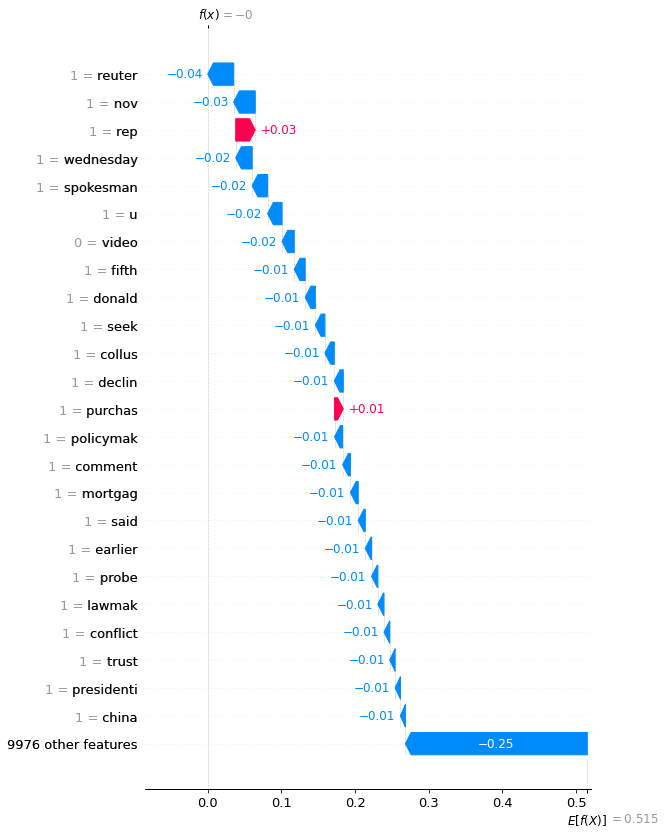

("Article 40: Trump refers to a 'Pocahontas' in Congress at meeting with "
 'veterans- President Donald Trump said there was a “Pocahontas” in the U.S. '
 'Congress during a meeting on Monday with Native American World War Two '
 'veterans in an apparent derogatory reference to Democratic Senator Elizabeth '
 'Warren of Massachusetts.After listening to one veteran speak at length about '
 'his experience as a “Navajo code talker” during the war, Trump heaped praise '
 'on the veterans and said he would not give prepared remarks himself.“You '
 'were here long before any of us were here,” Trump said.“Although we have a '
 'representative in Congress who they say was here a long time ago.They call '
 'her Pocahontas.”Trump repeatedly referred to Warren as “Pocahontas,” the '
 'name of a famous 17th-century Native American, during his presidential '
 'campaign in a mocking reference to Warren’s having said in the past that she '
 'had Native American ancestry.Warren, one of the Senate’s m

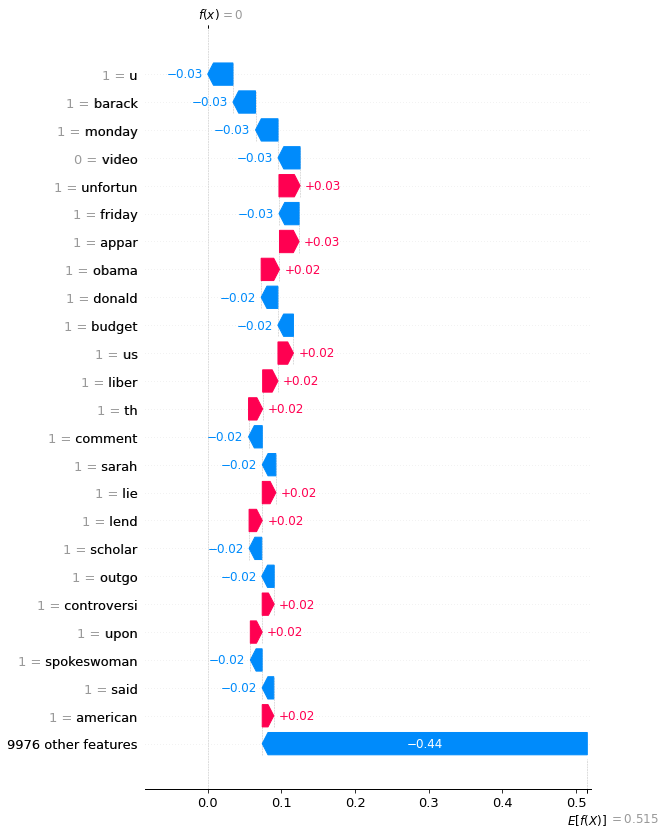

('Article 60: Trump says will release nearly all JFK assassination filesU.S. '
 'President Donald Trump said on Saturday he would release all documents '
 'related to the 1963 assassination of President John F. Kennedy except those '
 'with the names and addresses of people who are still alive.“After strict '
 'consultation with General Kelly, the CIA and other Agencies, I will be '
 'releasing ALL #JFKFiles other than the names and addresses of any mentioned '
 'person who is still living,” Trump wrote in a series of tweets, referring to '
 'his chief of staff John Kelly.   \n'
 'True Label: ?')


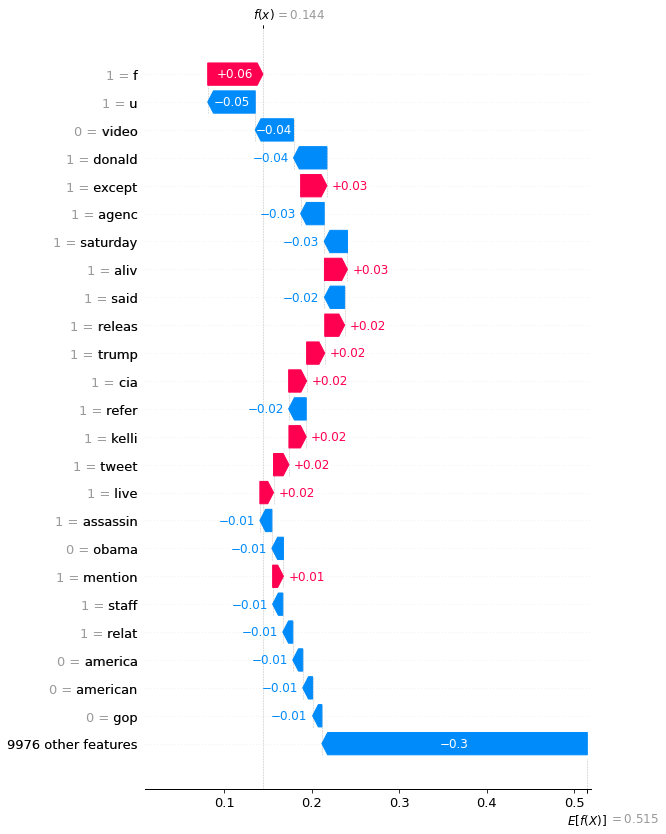

("Article 80: World 'running out of time' on North Korea, Trump to tell Asia: "
 'White HouseU.S. President Donald Trump will tell leaders on a five-nation '
 'Asia tour the world is “running out of time” on North Korea’s nuclear crisis '
 'and that he will give his strategy to isolate Pyongyang a few months before '
 'making adjustments, a top aide said on Thursday.Trump leaves on Friday for '
 'Hawaii, the first stop en route to Asia where he will visit Japan, South '
 'Korea, China, Vietnam and the Philippines.It will be the longest Asia tour '
 'by an American president in more than 25 years.His goal will be to increase '
 'international support for an  effort to deprive North Korea of resources as '
 'leverage to coerce it to give up nuclear weapons.“The president recognizes '
 'that we’re running out of time (to deal with North Korea) and will ask all '
 'nations to do more,” White House national security adviser H.R. McMaster '
 'told reporters at a briefing.As part of the U.S. 

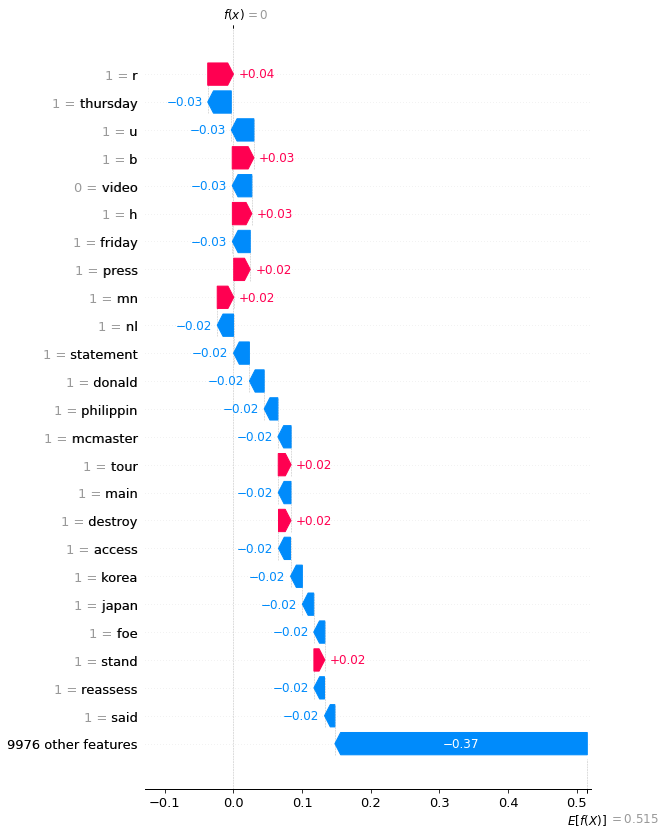

('Article 100: Another U.S. appeals court refuses to revive Trump travel '
 'banSAN FRANCISCO/WASHINGTON (Reuters) - President Donald Trump suffered '
 'another legal setback on Monday as a second federal appeals court refused to '
 'revive his travel ban on people entering the United States from six '
 'Muslim-majority nations in a dispute headed to the U.S. Supreme Court. The '
 'San Francisco-based 9th U.S. Circuit Court of Appeals  used narrow grounds '
 'to reject the Trump administration’s bid to undo a Hawaii federal judge’s '
 'decision blocking the temporary ban. It said the Republican president’s '
 'March 6 order violated existing immigration law. But the three-judge panel - '
 'all Democratic appointees - did not address whether it was unconstitutional '
 'discrimination against Muslims. A second court, the Richmond, Virginia-based '
 '4th U.S. Circuit Court of Appeals, on May 25 upheld a Maryland judge’s '
 'ruling that also blocked Trump’s 90-day ban on travelers from Lib

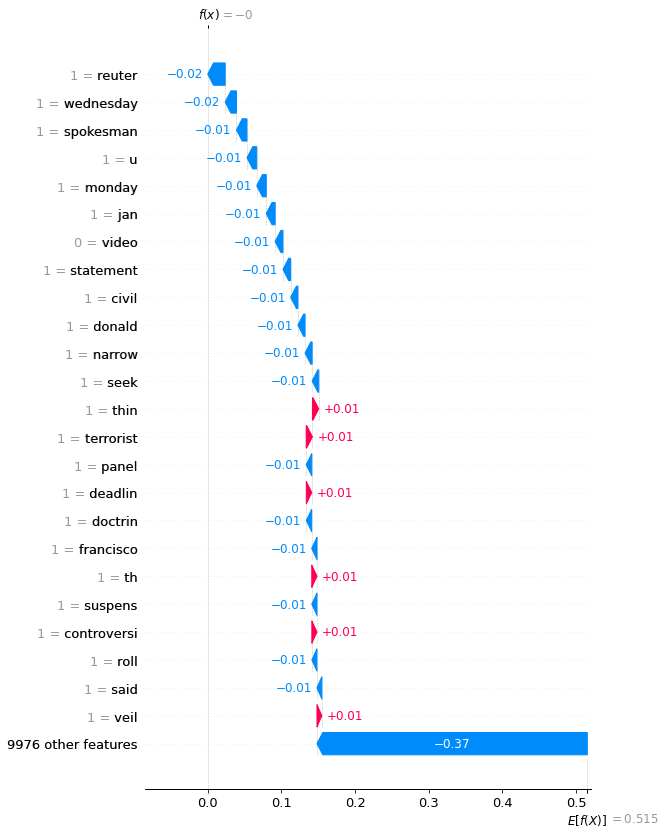

('Article 120: Kremlin says U.S. closure of consulate fuels U.S.-Russia '
 'tensionsThe Kremlin said on Friday that a U.S. decision to close Russia’s '
 'San Francisco consulate and buildings in Washington and New York pushed '
 'bilateral ties further into a blind alley and fueled a spiral of tit-for-tat '
 'retaliatory measures.The United States on Thursday ordered Russia to close '
 'the facilities by Sept. 2 in retaliation for Moscow cutting the U.S. '
 'diplomatic presence in Russia.“The new steps push our bilateral relations '
 'even further into a dead end and contradict other high level announcements '
 ',” Kremlin foreign policy aide Yuri Ushakov told a news briefing when asked '
 'about the closures.“There have been words, but there’s no readiness to '
 'cooperate yet.This is about further escalating tensions.We regret this and '
 'will calmly think about how we might respond.”Russian Foreign Minister '
 'Sergei Lavrov said earlier on Friday that Moscow would respond harshly 

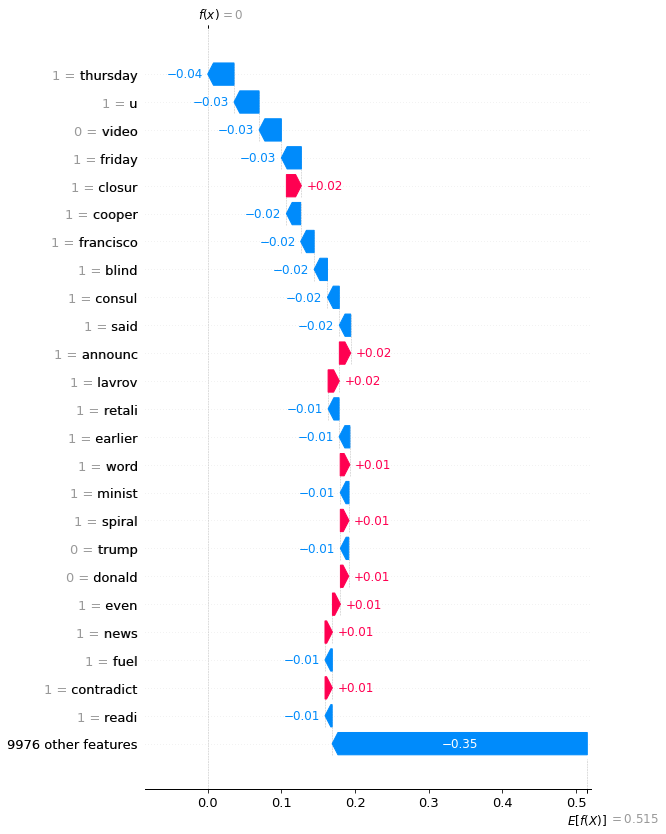

('Article 140: Kremlin: Putin, Trump to meet on sidelines of G20 summit“They '
 'will meet in any case there, on the sidelines of this summit, but no '
 '(separate) meeting is planned at the moment,” Peskov said. \n'
 'True Label: ?')


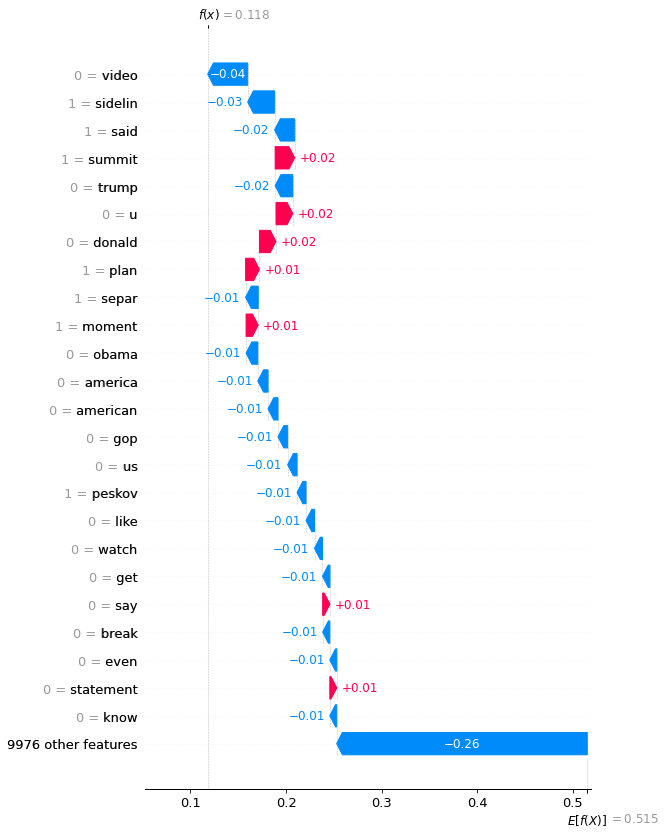

('Article 160: White House seeking sharp budget cut to climate agency: '
 'Washington PostThe Trump administration is seeking a 17 percent cut to the '
 'budget of the government’s meteorological agency that monitors the climate '
 'and issues daily weather forecasts, the Washington Post reported on '
 'Friday.Citing a four-page budget memo, the Post said the proposed reductions '
 'in the budget of the National Oceanic and Atmospheric Administration (NOAA) '
 'would affect research and satellite programs and eliminate funding for some '
 'smaller programs.The NOAA is part of the Commerce Department, whose overall '
 'budget “would be hit by an overall 18 percent reduction from its current '
 'funding level,” it said.The paper did not give a total figure for the '
 'proposed cuts, but said the White House Office of Management and Budget '
 'outline for the Commerce Department’s budget for fiscal year 2018 included '
 'sharp reductions for specific parts of the NOAA.The agency’s satelli

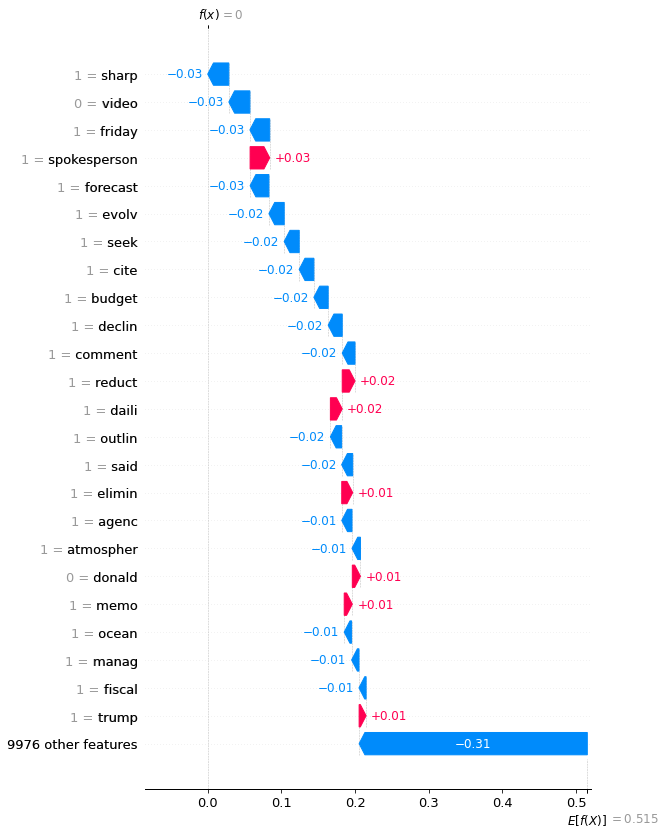

('Article 180: U.S. watchdog agency to review implementation of Trump travel '
 'banA watchdog agency at the U.S. Department of HomelandSecurity said it is '
 'planning to review how President Donald Trump’s immigration executive order '
 'to temporarily suspend travel from seven majority-Muslim nations was '
 'implemented.The review of Friday’s order was being planned “in response to '
 'congressional request and whistleblower and hotline complaints,” the DHS’s '
 'Office of Inspector General said in a statement late Wednesday.  The '
 'watchdog agency would also look at “DHS’ adherence to court orders and '
 'allegations of individual misconduct on the part of DHS personnel,” the '
 'statement said.\xa0“If circumstances warrant, the OIG will consider '
 'including other issues that may arise during the course of the review.”The '
 'order, which barred Syrian refugees indefinitely and imposed a 90-day '
 'suspension on people from seven predominantly Muslim countries, triggered '
 'wi

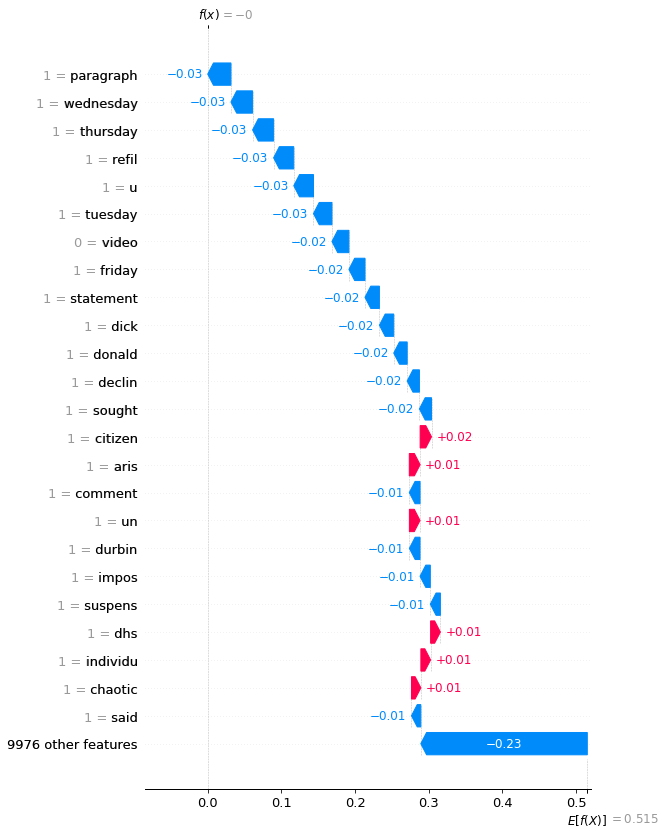

('Article 200: WOW! NEW VIDEO BLOWS UP CORRUPTION Between Obama, Democratic '
 'Operative, Hillary Campaign “Consultant” Bob Creamer [VIDEO]These videos, by '
 'James O Keefe and friends at Project Veritas bust the corrupt nature of '
 'Hillary Clinton s campaign, the Democratic Party and the underbelly of their '
 'operations wide open. James O Keefe has taken a sledge hammer to this '
 'well-organized criminal machine. If American voters are not shocked to the '
 'core by the level of corruption used to elect Hillary, they no longer have a '
 'conscience . Watch Bob Creamer admit to undercover agent for Project Veritas '
 'that Obama is trying to make America more like GUN-FREE Britain at the 15 '
 'min. mark.Bob Creamer on Obama:  He s a pro I do a lot of work with the '
 'White House on their issues, helping to run issue campaigns that they ve '
 'been involved in like immigration reform campaigns, for the health care '
 'bill, for the ah to try to make America more like Britain on

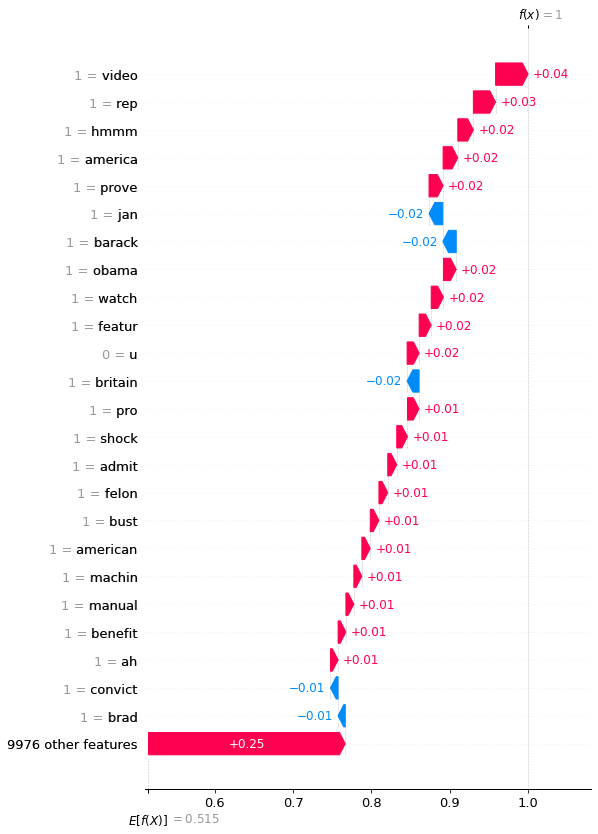

('Article 220: WHY AG LYNCH Should Recuse Herself From Clinton E-mail Probe '
 'ASAP! [Video]INFLUENCE PEDDLING is what the Clintons do and this time it '
 'could (hopefully) have consequences.  \n'
 'True Label: ?')


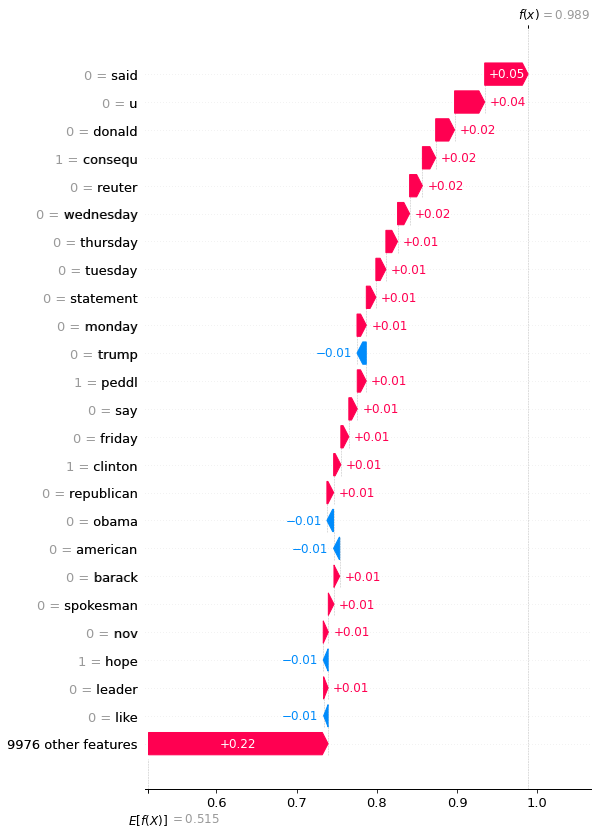

('Article 240: #CrookedHillary Uses Twitter To Accuse Trump Of Being A '
 '“Racist”…Forgets To Mention $20K+ In Donations From KKK In 2016 '
 '[VIDEO]Hillary Clinton is bending over backwards to convince American voters '
 'that Donald Trump is a  racist  because a White Supremacist and a KKK member '
 'said they plan to vote for him. ]who eulogized KKK leader, mentor and close '
 'friend, Robert C. Byrd, and about the $20,000 donation she accepted from the '
 'KKK just this year!?  Here s a tweet from the woman who REFUSES to speak to '
 'reporters after being caught in yet ANOTHER SCANDAL. This time, its been '
 'revealed that Hillary and her grifter and serial rapist husband have been '
 'selling our nation for favors through their pay-to-play slush fund, the '
 "Clinton Foundation (Criminal Piggy Bank). Oh yeah about that tweet:It's not "
 'a coincidence that white supremacists proudly support Trump. '
 'pic.twitter.com/3OX4I1GSkr  Hillary Clinton (@HillaryClinton) August 25, '
 '2

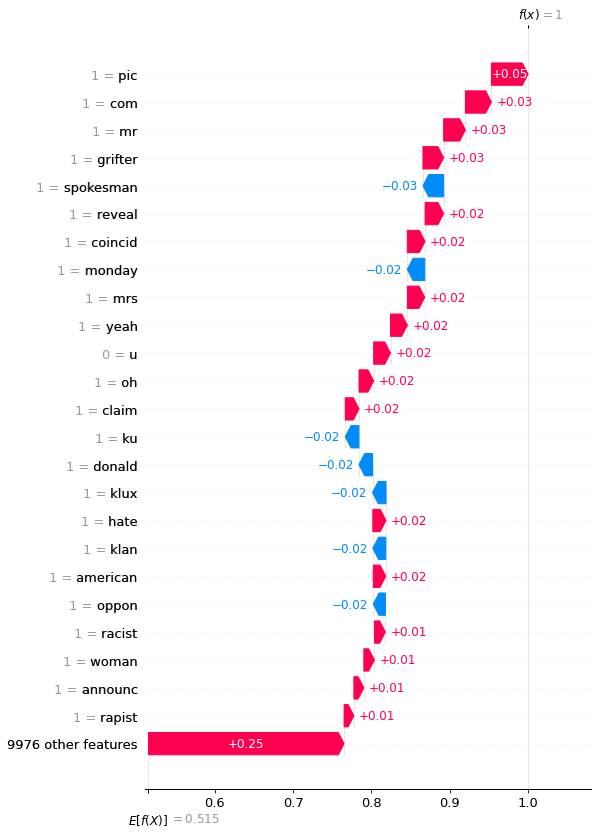

('Article 260: Former NYPD VIP Security Detail Says Hillary’s Debate Stage '
 'Disappearance Was Due To “problems from [previous] brain injury”Almost as '
 'scary as the idea that Hillary would lie about a major health concern, is '
 'the fact that we have no idea who Hillary will choose as her running mate '
 'Democrat frontrunner Hillary Clinton s disappearance from the debate stage '
 'last month left people speculating that the former First Lady took a long '
 'bathroom break, but now a law-enforcement source with inside connections is '
 'alleging that Clinton was missing from the stage due to health issues '
 'stemming from a previous brain injury.These long-lasting symptoms stemming '
 'from a concussion and blood clot, according to a neurologist, suggest '
 'Clinton is suffering from post-concussion syndrome, which can severely '
 'impact her cognitive abilities.All that said, however, Clinton s campaign '
 'maintained to Breitbart News that she is in good health and can serve 

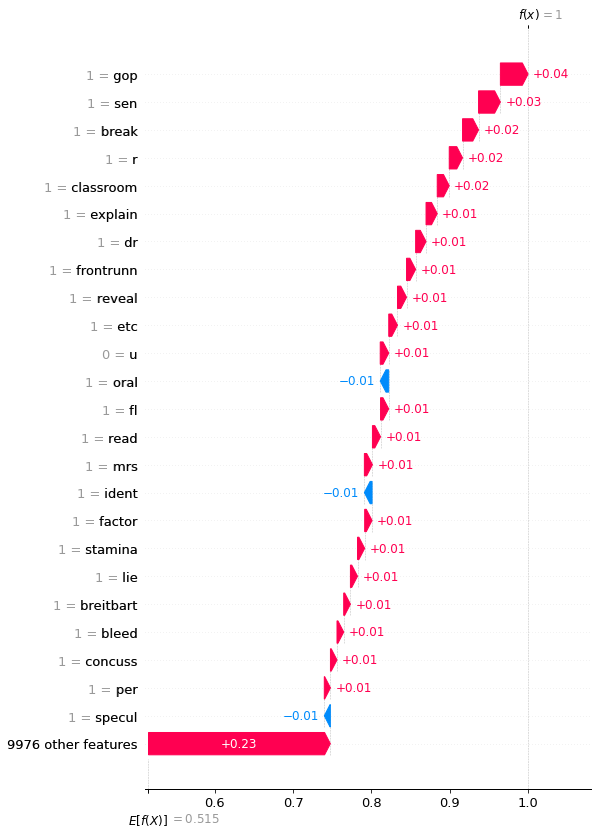

('Article 280: WHOA! CHUCK TODD’S Combative and Insulting Interview of Sec of '
 'State Rex Tillerson Goes Off The Rails [Video]Chuck Todd exposed his nasty '
 'side when he totally abused the Secretary of State Rex Tillerson on his show '
 'Meet the Press: Of course, Tillerson held his own and gave replies that we '
 'full of credibility and support for President Trump: I have a great '
 'relationship with the president. I understand what his objectives are. When '
 'I m not clear on what his objectives are, we talk about it. I am devoted to '
 'helping the president achieve his objectives, helping him be successful. And '
 'I understand I have to earn his confidence every day with how I go about '
 'those affairs and how I go about conducting the State Department s '
 'activities consistent with the direction he wants to take the country. '
 'Secretary of State Rex Tillerson on Pres. Trump:  I have to earn his '
 'confidence every day.  Watch more tomorrow on #MTP '
 'pic.twitter.com

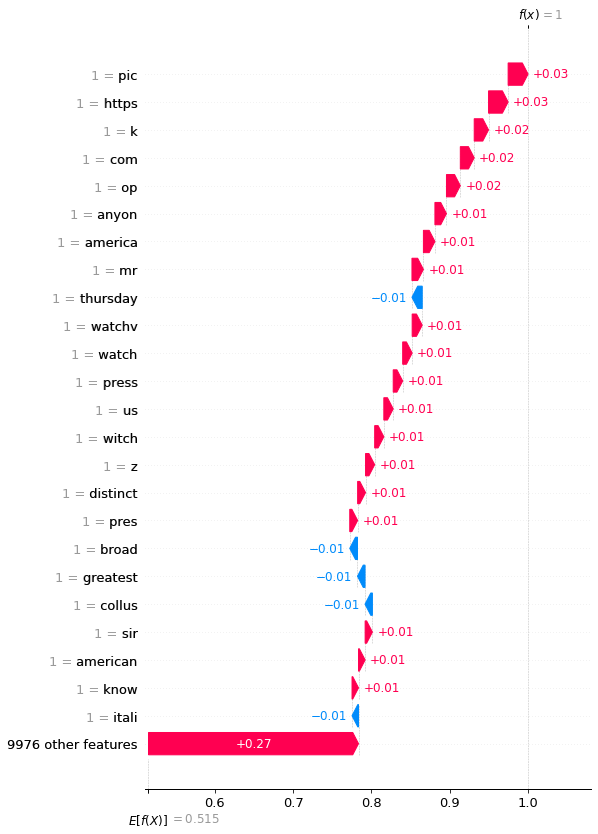

('Article 300: NANCY PELOSI Screws Up the Oath of Office While Lecturing '
 'Reporters on the Seriousness of Her Job [Video]Not a day goes by that we '
 'have another gaffe from Nancy Pelosi Term Limits Please!.@NancyPelosi screws '
 'up the oath of office while lecturing reporters about the seriousness of her '
 'job. pic.twitter.com/hLGCxsqK4m  Josh Caplan (@joshdcaplan) July 30, 2017 '
 'PELOSI:  As you know, today we ll be debating what s called the minibus, '
 'minibus. Not an omnibus, everything, minibus. And it, on the subject of '
 'security, as you know, all of us, anyone who serves in government or '
 'civically involved takes an oath of office to protect and defend. Support '
 'and defend the Constitution of the United States. Our first responsibility '
 'is to protect the American people and our constitution. If people are not '
 'safe, how can we proceed in any other way?  \n'
 'True Label: ?')


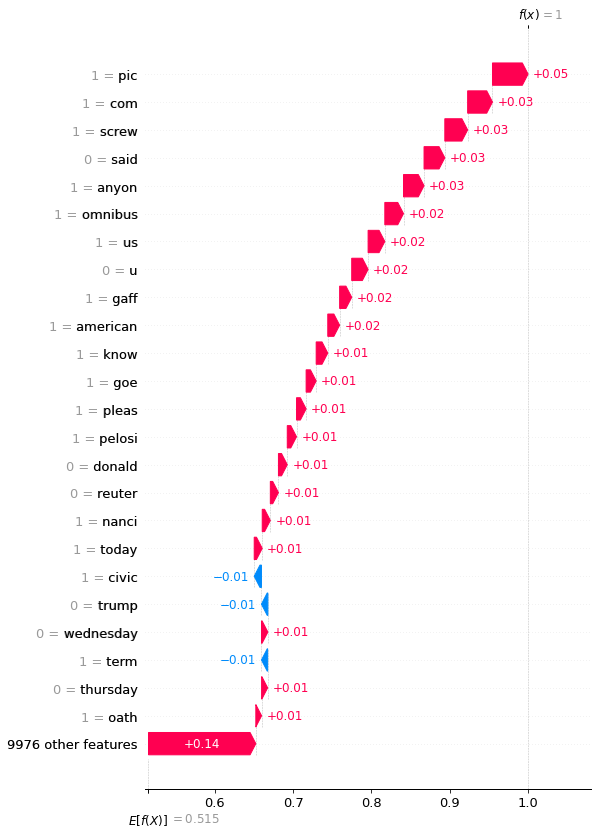

('Article 320: JUDGE JEANINE IS FURIOUS! “Hillary Won’t Stop Lying!” '
 '[VIDEO]Can you blame her for losing her cool with Crooked Lying Hillary? '
 'Share this with all of your  undecided  '
 'friends!https://youtu.be/CCkXOix0g2Y \n'
 'True Label: ?')


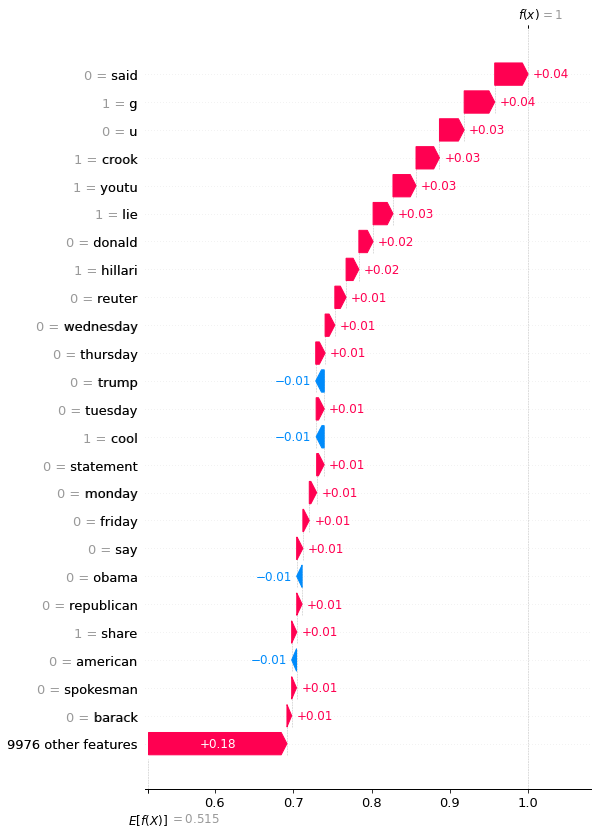

('Article 340: WATCH PRESIDENT TRUMP ARRIVE ON AIR FORCE ONE: Scheduled To '
 'Host Red Cross Charity Event At Mar-A-Lago…Angry Leftists Plan Protest '
 '[VIDEO]The president s visit stretches from Friday afternoon to Monday '
 'morning, when he will travel to MacDill Air Force Base in Tampa. He s then '
 'expected to head back to Washington, D.C.Here are five key things to know '
 'while Trump is in town:1. This is Trump s first visit to Palm Beach since '
 'his Jan. 20 inauguration.Before this trip, Trump s last visit to his Palm '
 'Beach home was over the Christmas and New Year s holidays, when he was still '
 'president-elect.While in town, he played golf twice: once with Tiger Woods '
 'at Trump s West Palm Beach golf course, and a second time on New Year s Eve '
 'at the Trump National Golf Club in Jupiter.Trump and first lady Melania '
 'attended a Christmas Eve church service at the historic Episcopal Church of '
 'Bethesda-by-the-Sea, where the couple was married and their so

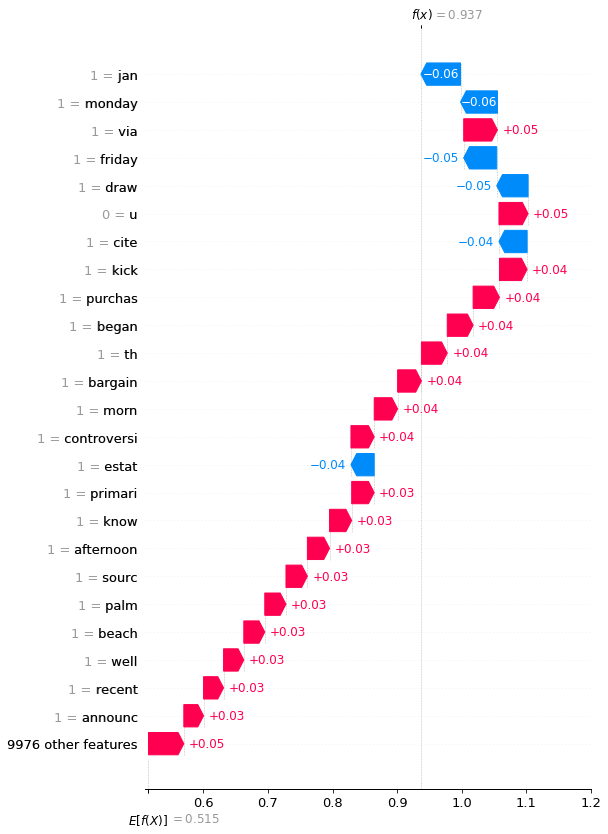

('Article 360: BREAKING: HILLARY CAUGHT MOCKING Bernie Sanders Supporters In '
 'Leaked Audio…Donors Laugh [Audio]We all know by now that Hillary Clinton '
 'will morph into whatever she needs to be to win votes to get back to the '
 'White House. Here s EXHIBIT 1 on just how far she ll go While speaking to a '
 'group of donors last February, Hillary mocked Bernie Sanders supporters and '
 'admitted the  free college  and  free healthcare are just a ploy to win the '
 'votes of millennials The Intercept had this to say about Clinton s flip '
 'flopping:Clinton has been inconsistent in the past about espousing political '
 'labels. She has at times touted herself as stalwart liberal. For instance, '
 'she said last July:  I take a backseat to no one when you look at my record '
 'in standing up and fighting for progressive values.  But a few months later, '
 'she told a group in Ohio:  You know, I get accused of being kind of moderate '
 'and center. I plead guilty. AUDIO OF CLINTON MO

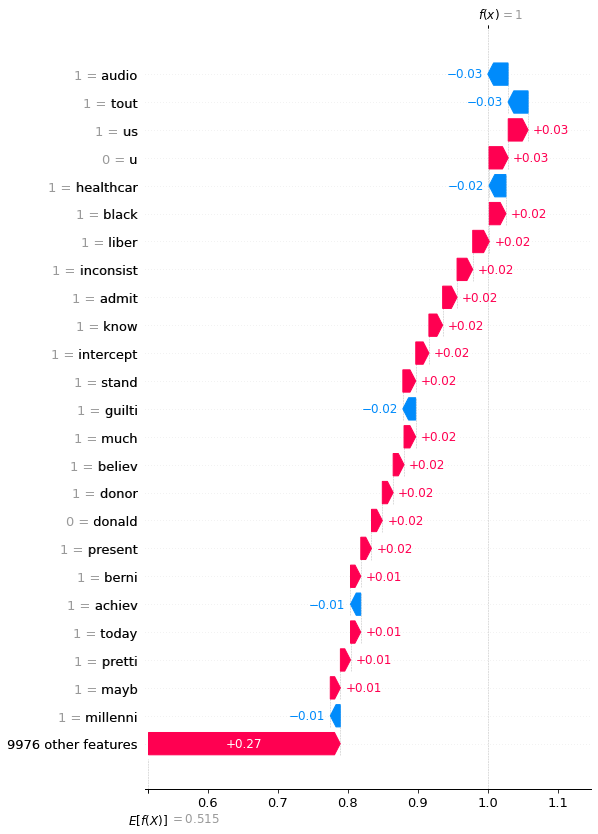

('Article 380: LIZ WARREN CALLED OUT For Crazy Claim Steve Bannon is a “White '
 'Supremacist” [Video]Liberals  internal struggle in one clip: '
 '.@andersoncooper on the level, .@SenWarren name-calling. #Bannon '
 'https://t.co/pX6TzNeRCP  William Bairamian (@Bairamian) December 1, 2016 \n'
 'True Label: ?')


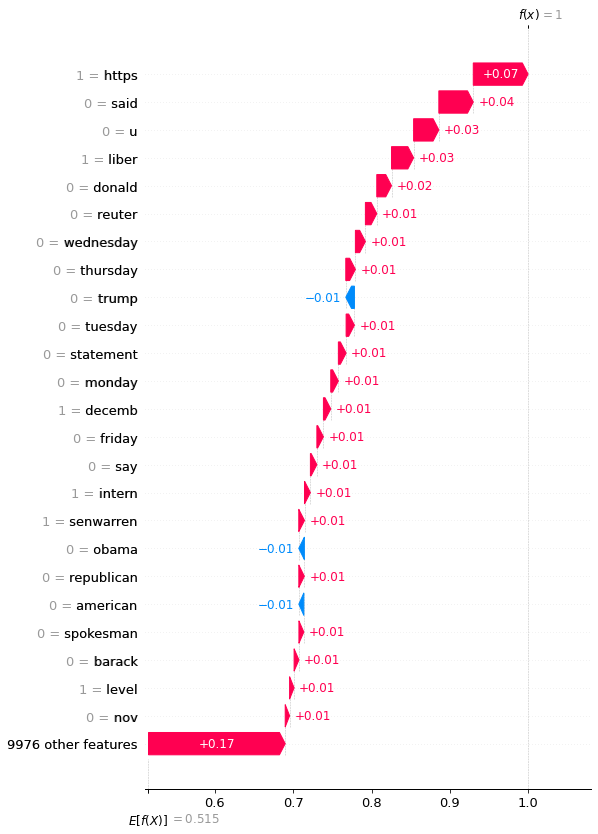

In [ ]:
shap.initjs()
import pprint as pp
from shap.plots._waterfall import waterfall_legacy
#drop word reuter for debug purposes
for i in range(0, 400, 20):
  pp.pprint(f"Article {i}: {sampled_df.content.iloc[i]} \nTrue Label: ?")
  waterfall_legacy(explainer.expected_value[0], shap_matrix[0][i], 
                      features = tes[i],
                      feature_names=wl[:10000],
                    max_display=25)
#shap_matrix shape: expected value X ith example X features (words in text)